In [1]:
setwd("~/WGS/SNPS/All_mylu/thetas/")
require("ggplot2")
require("data.table")

Loading required package: ggplot2
Loading required package: data.table


plot density distribution of sliding window http://www.ibg.uu.se/digitalAssets/178/c_178526-l_3-k_moore-david-arbete.pdf


In [2]:
NYE=fread("NY_E_thet.thetas_sw2", header=FALSE, sep=" ")

Warning message in fread("NY_E_thet.thetas_sw2", header = FALSE, sep = " "):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: # indexStart,indexStop firstPos_withData,lastPos_withData WinStart,WinStop Chr tW Tajima”

Read 970771 rows and 6 (of 6) columns from 0.069 GB file in 00:00:05


In [3]:
NYU=fread("NY_U_thet.thetas_sw2", header=FALSE, sep=" ")

Warning message in fread("NY_U_thet.thetas_sw2", header = FALSE, sep = " "):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: # indexStart,indexStop firstPos_withData,lastPos_withData WinStart,WinStop Chr tW Tajima”

Read 970813 rows and 6 (of 6) columns from 0.069 GB file in 00:00:06


In [4]:
NJE=fread("NJ_E_thet.thetas_sw2", header=FALSE, sep=" ")

Warning message in fread("NJ_E_thet.thetas_sw2", header = FALSE, sep = " "):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: # indexStart,indexStop firstPos_withData,lastPos_withData WinStart,WinStop Chr tW Tajima”

Read 970809 rows and 6 (of 6) columns from 0.069 GB file in 00:00:06


In [5]:
NJU=fread("NJ_U_thet.thetas_sw2", header=FALSE, sep=" ")

Warning message in fread("NJ_U_thet.thetas_sw2", header = FALSE, sep = " "):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: # indexStart,indexStop firstPos_withData,lastPos_withData WinStart,WinStop Chr tW Tajima”

Read 970758 rows and 6 (of 6) columns from 0.069 GB file in 00:00:06


In [6]:
VTE=fread("VT_E_thet.thetas_sw2", header=FALSE, sep=" ")

Warning message in fread("VT_E_thet.thetas_sw2", header = FALSE, sep = " "):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: # indexStart,indexStop firstPos_withData,lastPos_withData WinStart,WinStop Chr tW Tajima”

Read 970794 rows and 6 (of 6) columns from 0.069 GB file in 00:00:06


In [8]:
VTU=fread("VT_U_thet.thetas_sw2", header=FALSE, sep=" ")

Warning message in fread("VT_U_thet.thetas_sw2", header = FALSE, sep = " "):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: # indexStart,indexStop firstPos_withData,lastPos_withData WinStart,WinStop Chr tW Tajima”

In [9]:
colnames(NYE)=c("indexstartstop", "firstPos_withData", "WindowStartStop", "Scaffold", "tW", "D")
colnames(NYU)=c("indexstartstop", "firstPos_withData", "WindowStartStop", "Scaffold", "tW", "D")
colnames(NJE)=c("indexstartstop", "firstPos_withData", "WindowStartStop", "Scaffold", "tW", "D")
colnames(NJU)=c("indexstartstop", "firstPos_withData", "WindowStartStop", "Scaffold", "tW", "D")
colnames(VTE)=c("indexstartstop", "firstPos_withData", "WindowStartStop", "Scaffold", "tW", "D")
colnames(VTU)=c("indexstartstop", "firstPos_withData", "WindowStartStop", "Scaffold", "tW", "D")


In [13]:
tail(NYE)

indexstartstop,firstPos_withData,WindowStartStop,Scaffold,tW,D
"0,9999","1,10001","1,10001",AAPE02066169,65.57562,0.546701
"0,9550","1,10001","1,10001",AAPE02066170,106.86889,-1.130331
"0,9822","1,10001","1,10001",AAPE02066171,93.81567,-1.138933
"0,8316","1,10001","1,10001",AAPE02066182,104.97464,-0.879327
"0,9914","1,10001","1,10001",AAPE02066183,93.92527,-1.203734
"0,9942","1,10001","1,10001",AAPE02066186,213.08328,-0.191957


In [12]:
tail(NYU)

indexstartstop,firstPos_withData,WindowStartStop,Scaffold,tW,D
"0,9940","1,10001","1,10001",AAPE02066174,83.63477,-0.829428
"0,9736","1,10001","1,10001",AAPE02066180,89.77674,-1.031395
"0,9613","1,10001","1,10001",AAPE02066182,101.89192,-0.925169
"0,9201","1,10001","1,10001",AAPE02066184,87.48645,-0.894316
"0,9940","3,10003","3,10003",AAPE02066185,95.41182,-0.847431
"0,9944","1,10001","1,10001",AAPE02066186,223.52681,-0.104806


In [30]:
NY=merge(NYE, NYU, by=c("Scaffold", "firstPos_withData"), all=T)
VT=merge(VTE, VTU, by=c("Scaffold", "firstPos_withData"), all=T)
NJ=merge(NJE, NJU, by=c("Scaffold", "firstPos_withData"), all=T)

In [36]:
#NY$diffD=NY$D.x-NY$D.y
#NJ$diffD=NJ$D.x-NJ$D.y
VT$diffD=VT$D.x-VT$D.y

In [28]:
plotNY=ggplot(data=NY, aes(x=Scaffold, y=diffD))+
  geom_point(data=NY)+ theme_bw()+theme(axis.text.x=element_blank(), panel.grid.minor = element_blank(), panel.grid.major = element_blank())+ ggtitle("NY")+theme(plot.title = element_text(hjust = 0.5))

Warning message:
“Removed 1024635 rows containing missing values (geom_point).”

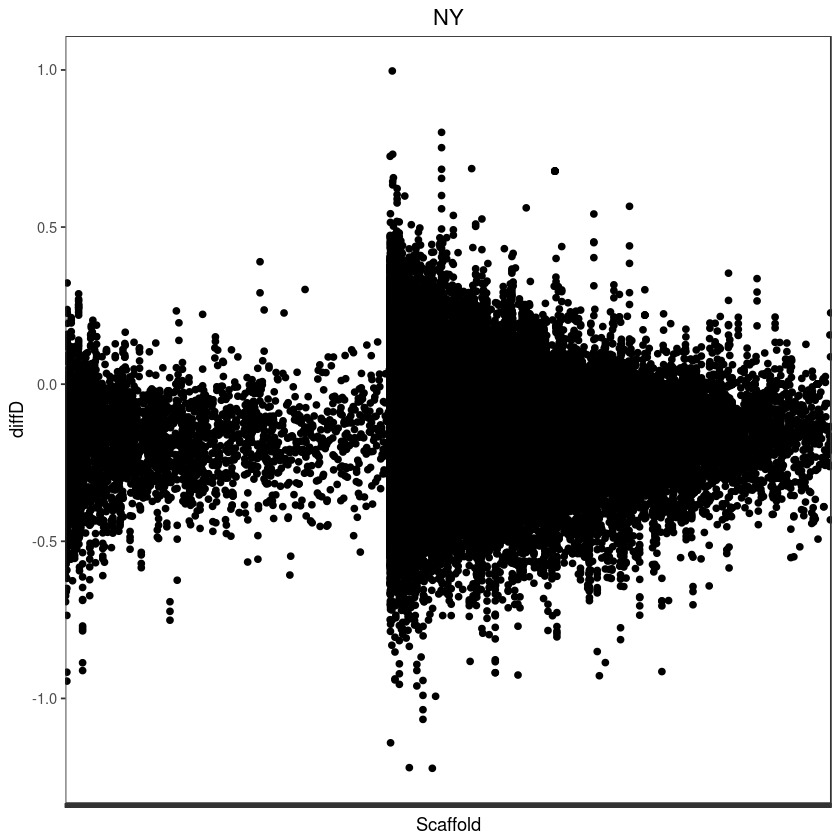

In [29]:
plotNY

In [58]:
NYlow=NY[NY$diffD<(-.5),]
NROW(NYlow)
#print(NYlow)

[1] 1500

Warning message:
“Removed 1070375 rows containing missing values (geom_point).”

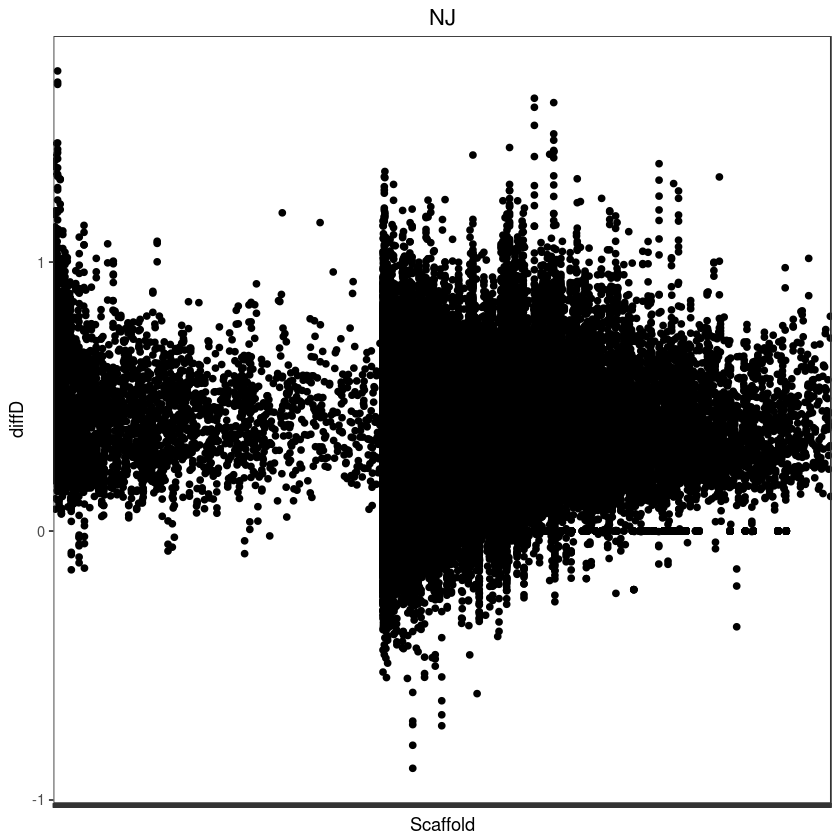

In [43]:
plotNJ

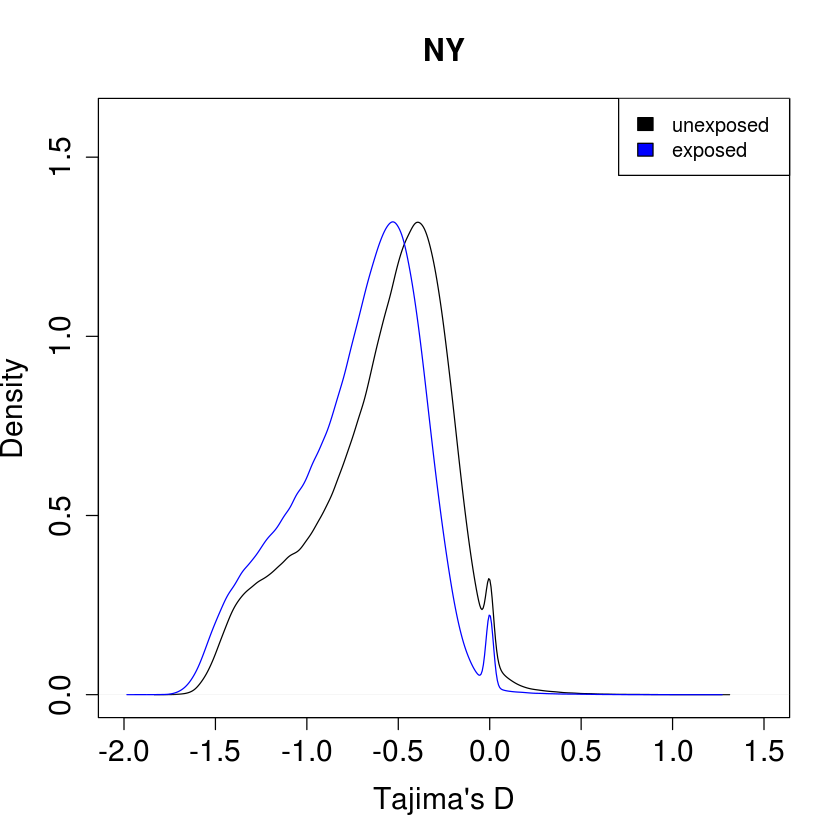

In [34]:
plot(density(NYU$D), main="NY", cex.main=1.5, xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5, xlim = c(-2,1.5), ylim=c(0,1.6))
lines(density(NYE$D), col="blue") 
legend("topright", c("unexposed", "exposed"), fill=c("black", "blue"))

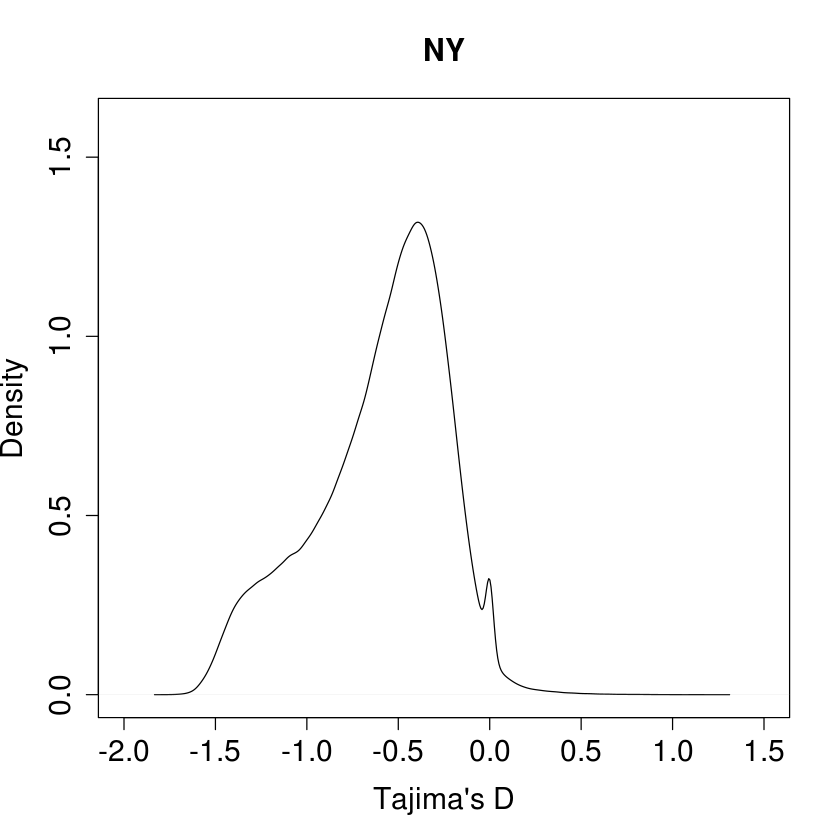

In [10]:
plot(density(NYU$D), main="NY", cex.main=1.5, xlim = c(-2,1.5), ylim=c(0,1.6), xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5)

In [ ]:
plotNJ=ggplot(data=NJ, aes(x=Scaffold, y=diffD))+
  geom_point(data=NJ)+ theme_bw()+theme(axis.text.x=element_blank(), panel.grid.minor = element_blank(), panel.grid.major = element_blank())+ ggtitle("NJ")+theme(plot.title = element_text(hjust = 0.5))

Warning message:
“Removed 1070375 rows containing missing values (geom_point).”

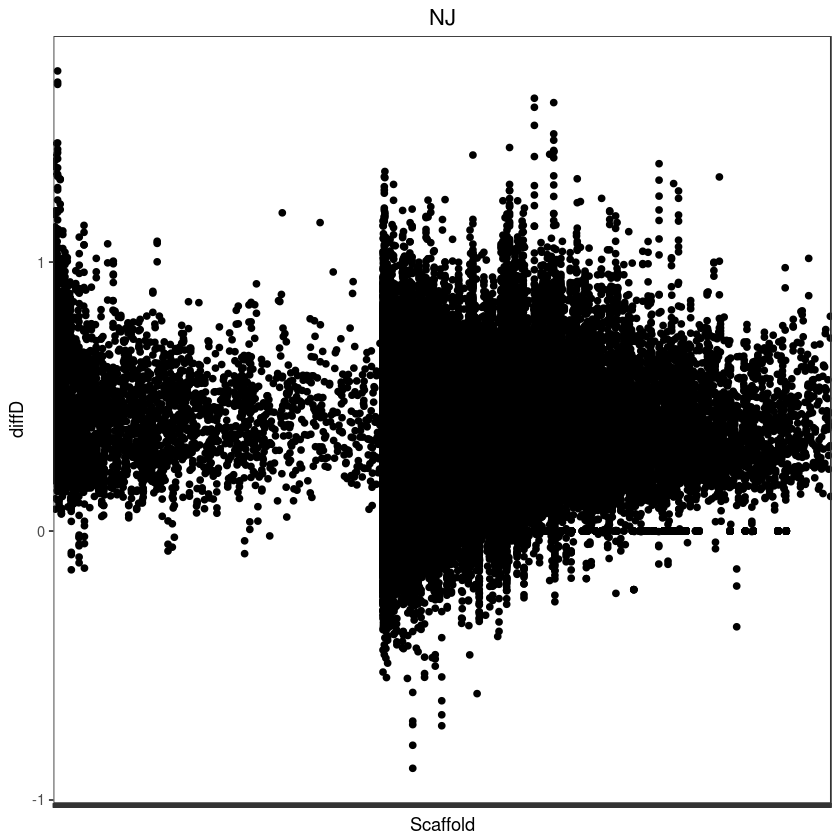

In [44]:
plotNJ

In [53]:
NJhigh=NJ[NJ$diffD>1.2,]
NROW(NJhigh)
print(NJhigh)

[1] 75

        Scaffold firstPos_withData  indexstartstop.x WindowStartStop.x
 1: AAPE02056973       18001,28001       17976,27961       18001,28001
 2: AAPE02056973       20001,30001       19961,29961       20001,30001
 3: AAPE02057662       44001,54001       43714,53714       44001,54001
 4: AAPE02057662       46001,56001       45714,55714       46001,56001
 5: AAPE02057662       48001,58001       47714,57714       48001,58001
 6: AAPE02058028       20001,30001       19905,29902       20001,30001
 7: AAPE02058028       22001,32001       21905,31902       22001,32001
 8: AAPE02058028       24001,34001       23905,33902       24001,34001
 9: AAPE02058028       26001,36001       25902,35902       26001,36001
10: AAPE02058028       28001,38001       27902,37895       28001,38001
11: AAPE02058028       30001,40001       29902,39895       30001,40001
12: AAPE02058028       32001,42001       31902,41895       32001,42001
13: AAPE02058028       34001,44001       33902,43895       34001,44001
14: AA

In [57]:
NJlow=NJ[NJ$diffD<(-.5),]
NROW(NJlow)
#print(NJlow)

[1] 16

In [59]:
NJNYlow=merge(NJlow, NYlow, by=c("Scaffold", "firstPos_withData"))

In [60]:
NJNYlow

Scaffold,firstPos_withData,indexstartstop.x.x,WindowStartStop.x.x,tW.x.x,D.x.x,indexstartstop.y.x,WindowStartStop.y.x,tW.y.x,D.y.x,diffD.x,indexstartstop.x.y,WindowStartStop.x.y,tW.x.y,D.x.y,indexstartstop.y.y,WindowStartStop.y.y,tW.y.y,D.y.y,diffD.y
GL429973,"132001,142001","129654,139654","132001,142001",102.250717,-1.113484,"129389,139389","132001,142001",149.595790,-0.231314,-0.882170,"129099,139099","132001,142001",136.817815,-0.980294,"129458,139458","132001,142001",140.832268,-0.442632,-0.537662
GL430419,"435462,436001","309627,310166","426001,436001",3.005411,-1.004276,"309082,309621","426001,436001",7.512886,-0.399731,-0.604545,"308964,309503","426001,436001",5.370516,-1.226081,"310284,310823","426001,436001",6.198676,-0.433523,-0.792558


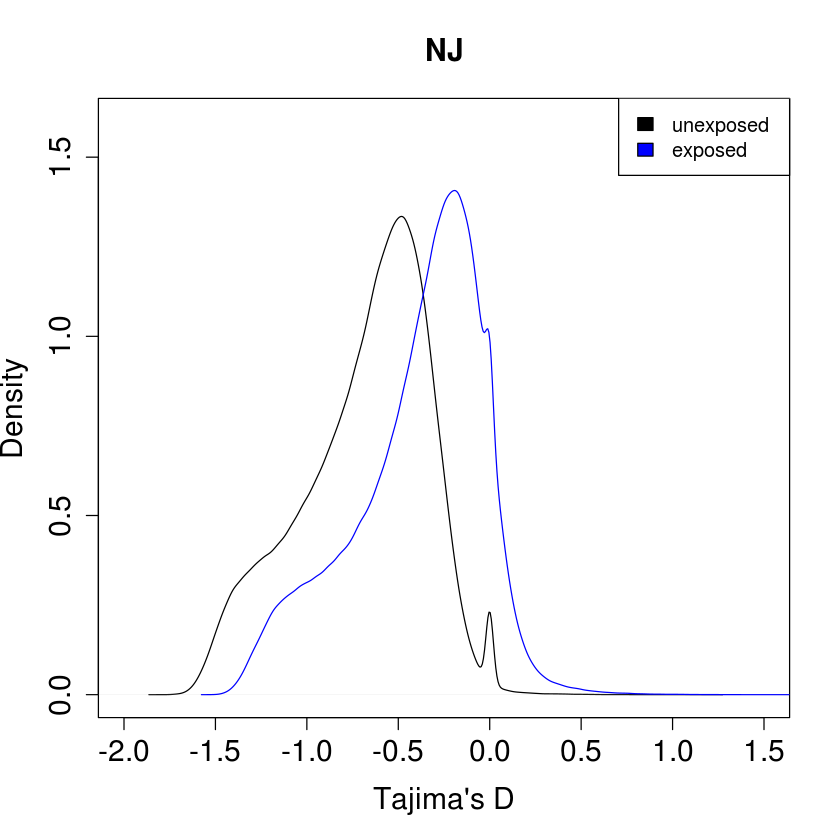

In [16]:
plot(density(NJU$D), main="NJ", cex.main=1.5, xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5, xlim = c(-2,1.5), ylim=c(0,1.6)) 
lines(density(NJE$D), col="blue") 
legend("topright", c("unexposed", "exposed"), fill=c("black", "blue"))

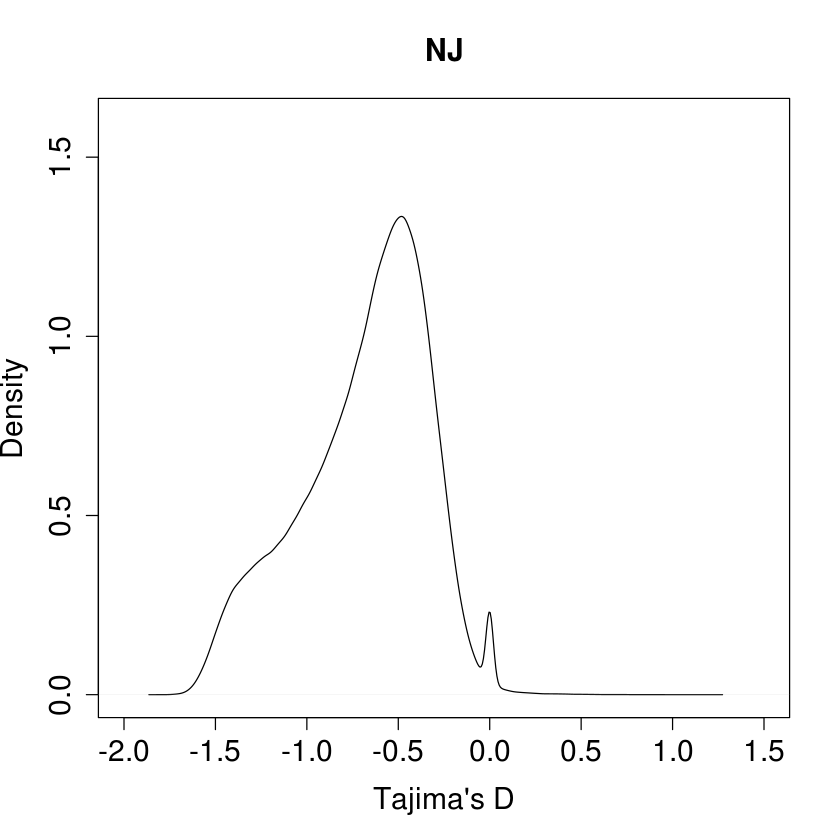

In [12]:
plot(density(NJU$D), main="NJ", cex.main=1.5, xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5, xlim = c(-2,1.5), ylim=c(0,1.6)) 

In [48]:
plotVT=ggplot(data=VT, aes(x=Scaffold, y=diffD))+
  geom_point(data=VT)+ theme_bw()+theme(axis.text.x=element_blank(), panel.grid.minor = element_blank(), panel.grid.major = element_blank())+ ggtitle("VT")+theme(plot.title = element_text(hjust = 0.5))

In [51]:
tail(VT)

Scaffold,firstPos_withData,indexstartstop.x,WindowStartStop.x,tW.x,D.x,indexstartstop.y,WindowStartStop.y,tW.y,D.y,diffD
GL433172,"1,16703","0,2918","1,10001",19.12332,-0.494724,NA,NA,NA,NA,NA
GL433172,"1,17524",NA,NA,NA,NA,"0,3763","0,17524",22.92322,-0.206462,NA
GL433172,"7615,16703","895,2918","2001,12001",13.20931,-0.585537,NA,NA,NA,NA,NA
GL433172,"7615,16703","895,2918","4001,14001",13.20931,-0.585537,NA,NA,NA,NA,NA
GL433172,"7615,16703","895,2918","6001,16001",13.20931,-0.585537,NA,NA,NA,NA,NA
GL433173,"1,5273",NA,NA,NA,NA,"0,3481","0,5273",26.87560,-0.988472,NA


Warning message:
“Removed 982448 rows containing missing values (geom_point).”

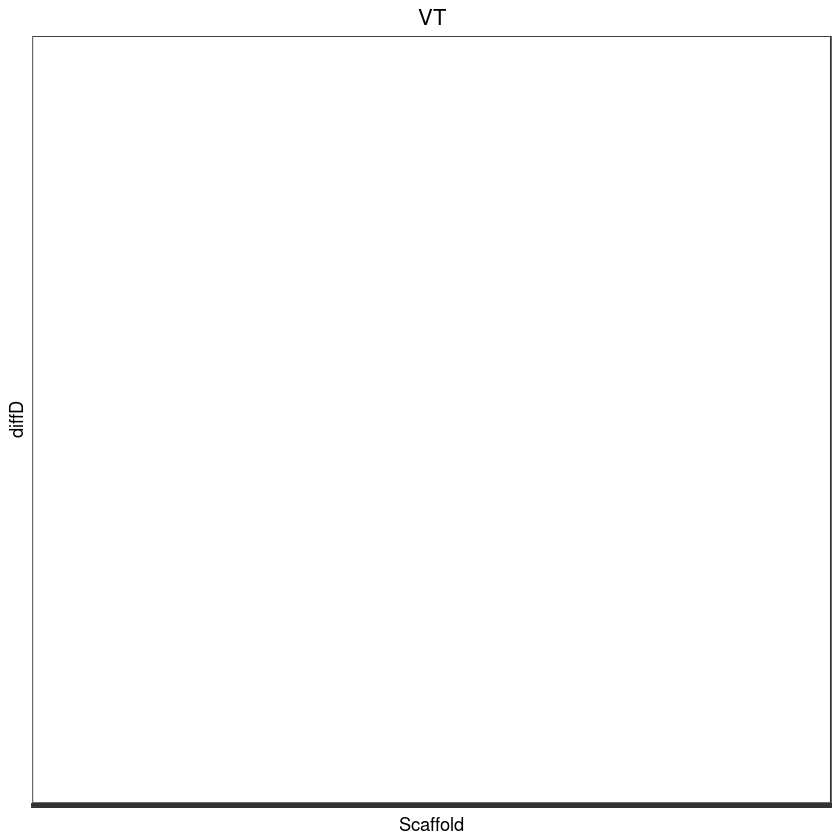

In [49]:
plotVT

Need to figure out a way to match up windows, possibly you need to set the start and stop of the window when you do the sliding window?

In [ ]:
NJlow=NJ[NJ$diffD<(-.6),]
NROW(NJlow)
print(NJlow)

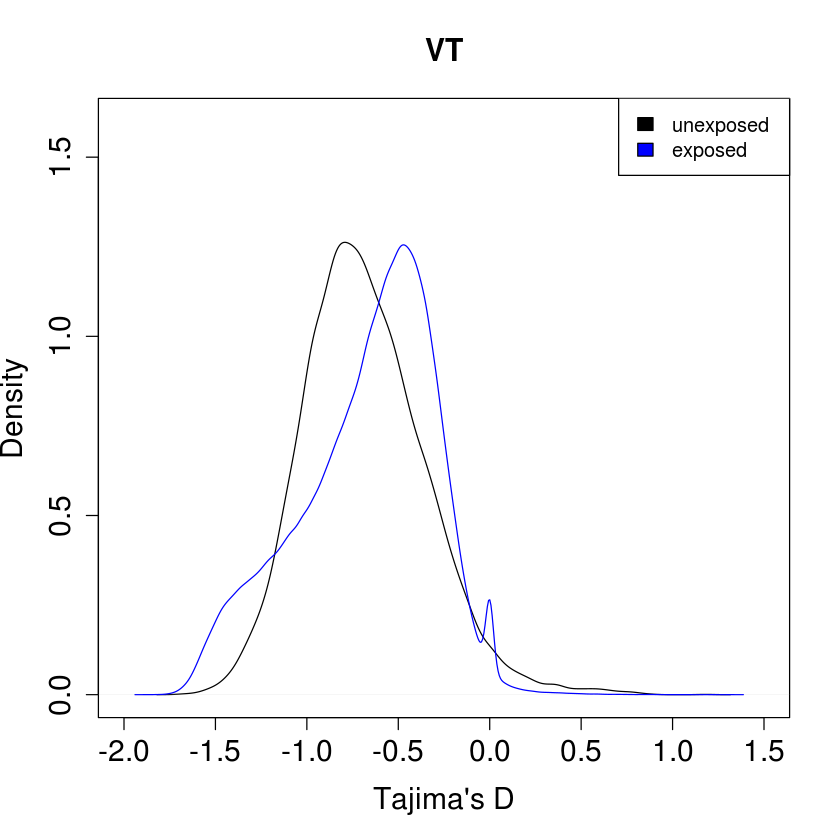

In [ ]:
plot(density(VTU$D), main="VT", cex.main=1.5, xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5, xlim = c(-2,1.5), ylim=c(0,1.6)) 
lines(density(VTE$D), col="blue") 
legend("topright", c("unexposed", "exposed"), fill=c("black", "blue"))

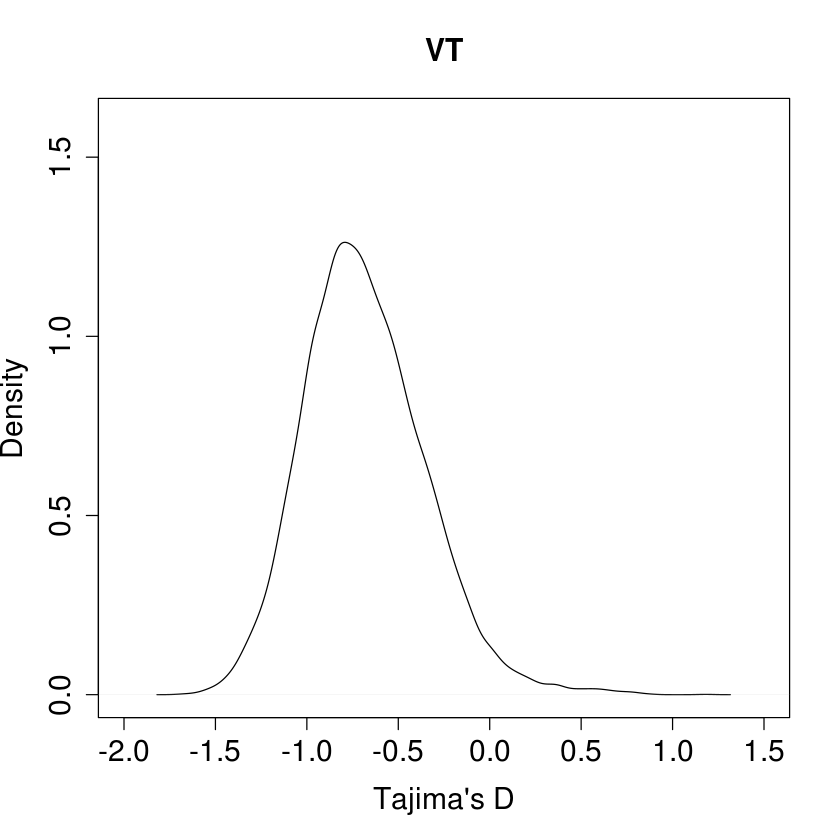

In [29]:
plot(density(VTU$D), main="VT", cex.main=1.5, xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5, xlim = c(-2,1.5), ylim=c(0,1.6)) 

I think that what is happening is that NY is ahead of NJ and VT in terms of recovery after bottleneck, so Tajimas D has becom negative again. 
Need to look at why VT is weirdly shaped